In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# Import Dataset
comp = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\5 Multi Linear Regression\\50_Startups.csv")
comp.head(50)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [3]:
# Check Null Values
comp.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
# Check Categorical Data
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
comp = comp.rename({'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'},axis = 1)

# Correlation Matrix

In [6]:
# Correlation Between Variable
comp.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

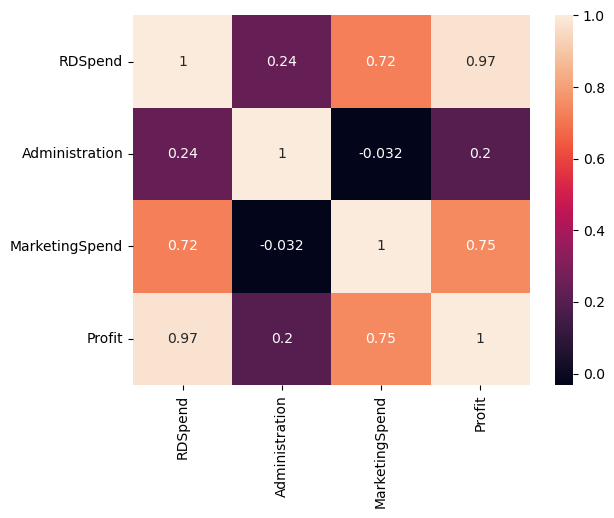

In [7]:
sns.heatmap(comp.corr(), annot=True)

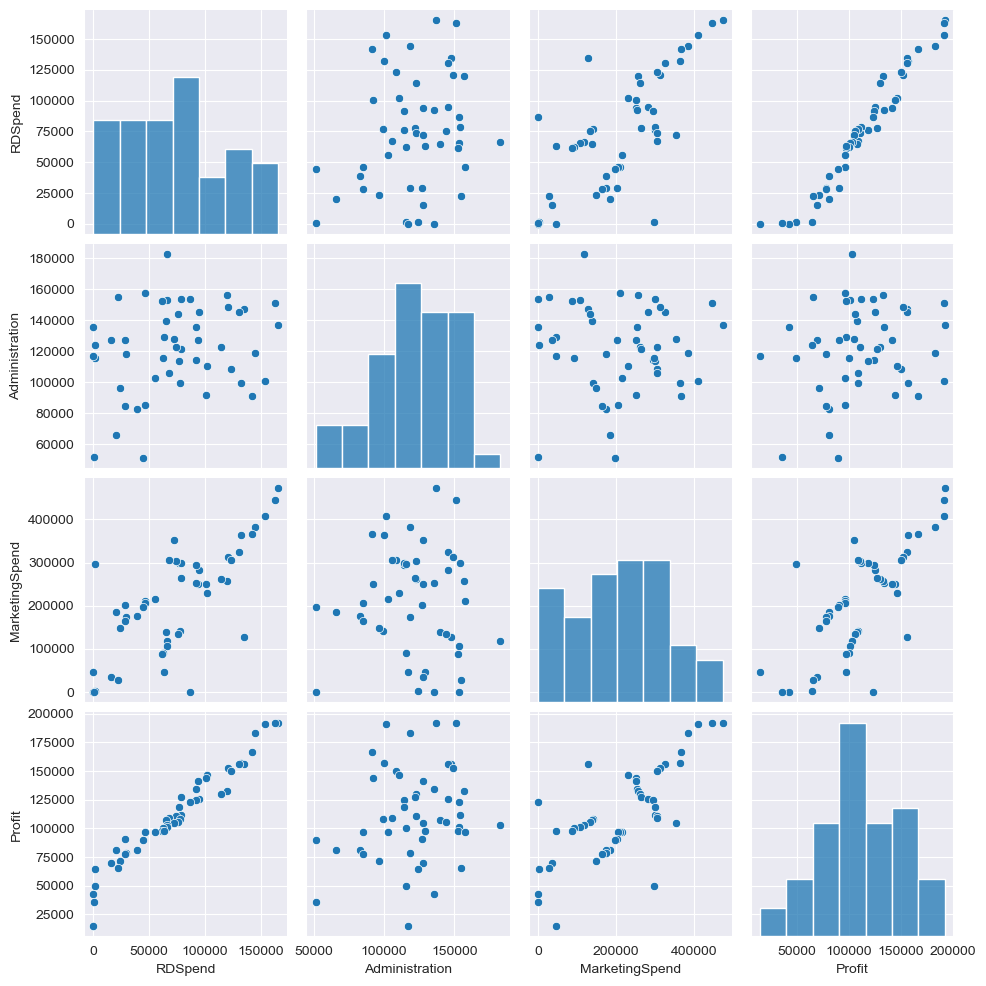

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(comp)

In [9]:
# Spliting the dataset 
X = comp.iloc[:,:4].values
y = comp.iloc[:,-1:].values

In [10]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [11]:
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [12]:
# State Column is Categorical data then Convert into Numerical Data using Encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [14]:
X = X[:,1:]

In [15]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

# Model Selection

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
X_train

array([[1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 44069.95, 51283.14, 197029.42],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [1.0, 0.0, 1315.46, 115816.21, 297114.46],
       [0.0, 0.0, 0.0, 135426.92, 0.0],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 77044.01, 99281.34, 140574.81],
       [0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 22177.74, 154806.14, 28334.72],
       [0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 1.0, 131876.9, 99814.71, 362861.3

In [18]:
y_train

array([[141585.52],
       [166187.94],
       [ 89949.14],
       [152211.77],
       [182901.99],
       [156122.51],
       [ 77798.83],
       [ 49490.75],
       [ 42559.73],
       [129917.04],
       [149759.96],
       [126992.93],
       [108552.04],
       [ 96712.8 ],
       [ 97483.56],
       [192261.83],
       [ 65200.33],
       [105008.31],
       [ 96778.92],
       [156991.12],
       [101004.64],
       [144259.4 ],
       [ 90708.19],
       [191792.06],
       [111313.02],
       [191050.39],
       [ 69758.98],
       [ 96479.51],
       [108733.99],
       [ 78239.91],
       [146121.95],
       [110352.25],
       [124266.9 ],
       [ 14681.4 ],
       [118474.03],
       [155752.6 ],
       [ 71498.49],
       [132602.65],
       [103282.38],
       [ 81229.06]])

In [19]:
X_test

array([[0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [1.0, 0.0, 61994.48, 115641.28, 91131.24],
       [0.0, 1.0, 1000.23, 124153.04, 1903.93],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [0.0, 1.0, 542.05, 51743.15, 0.0],
       [1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [0.0, 0.0, 64664.71, 139553.16, 137962.62],
       [0.0, 0.0, 63408.86, 129219.61, 46085.25],
       [0.0, 1.0, 86419.7, 153514.11, 0.0]], dtype=object)

In [20]:
y_test

array([[134307.35],
       [ 81005.76],
       [ 99937.59],
       [ 64926.08],
       [125370.37],
       [ 35673.41],
       [105733.54],
       [107404.34],
       [ 97427.84],
       [122776.86]])

# Linear Regression Model - ML Algorithum

In [21]:
# Build Linear Regression model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = regression.predict(X_test)

In [23]:
y_pred

array([[126362.87908252],
       [ 84608.45383643],
       [ 99677.49425155],
       [ 46357.46068582],
       [128750.48288497],
       [ 50912.41741905],
       [109741.350327  ],
       [100643.24281644],
       [ 97599.275746  ],
       [113097.42524437]])

In [24]:
y_test

array([[134307.35],
       [ 81005.76],
       [ 99937.59],
       [ 64926.08],
       [125370.37],
       [ 35673.41],
       [105733.54],
       [107404.34],
       [ 97427.84],
       [122776.86]])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


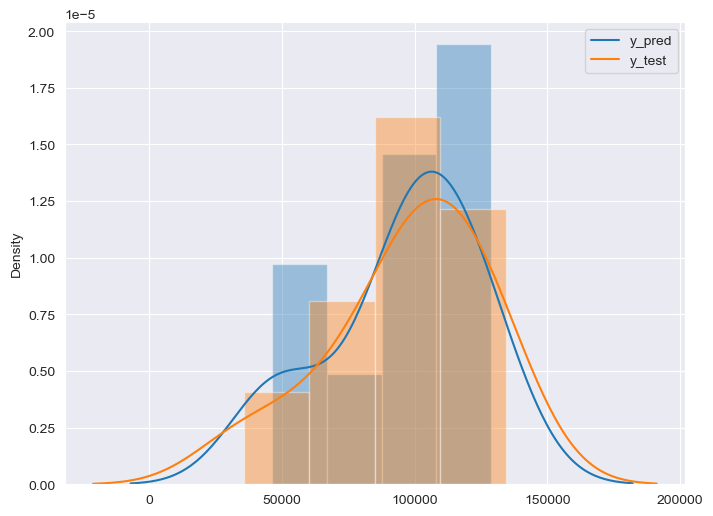

In [25]:
plt.figure(figsize=(8,6))
labels = ['y_pred', 'y_test']
sns.distplot(y_pred)
sns.distplot(y_test)
plt.legend(labels)

# Check Evalution Metrices

In [26]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)
rsquare = r2_score(y_true=y_test, y_pred=y_pred)

print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('MAPE',mape)
print('Adj. Square',rsquare)

# Model is Satisfied.

MAE 6961.477813275529
MSE 82010363.04501285
RMSE 9055.957323497767
MAPE 0.10278189896425194
Adj. Square 0.8987266414319847


In [27]:
inputdata = ({'State0':[0.0],'State1':[0.0],'RDSpend':[256942],'Administration':[124689],'MarketingSpend':[256745]})
input_pred = pd.DataFrame(inputdata)
input_pred

,State0,State1,RDSpend,Administration,MarketingSpend
0,0.0,0.0,256942,124689,256745


In [28]:
Pred_Profit1 = regression.predict(input_pred)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [29]:
Pred_Profit1

array([[260116.38286498]])

# Build Model using OLS

In [30]:
model = smf.ols('Profit ~ RDSpend + Administration + MarketingSpend + State', data=comp)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.34e-27
Time:                        15:01:41   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.82

In [31]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RDSpend                  0.806023
Administration          -0.027004
MarketingSpend           0.026980
dtype: float64

In [32]:
model.rsquared, model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

# Linear Regression Model

In [33]:
lr_rd = smf.ols('Profit ~ Administration', data = comp).fit()
print(lr_rd.tvalues)
print(lr_rd.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64
Intercept         0.003824
Administration    0.162217
dtype: float64


In [34]:
lr_rd = smf.ols('Profit ~ MarketingSpend', data = comp).fit()
print(lr_rd.tvalues)
print(lr_rd.pvalues)

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64
Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [35]:
lr_rd = smf.ols('Profit ~  Administration + MarketingSpend', data = comp).fit()
print(lr_rd.tvalues)
print(lr_rd.pvalues)
print(lr_rd.summary())

Intercept         1.142741
Administration    2.467779
MarketingSpend    8.281039
dtype: float64
Intercept         2.589341e-01
Administration    1.729198e-02
MarketingSpend    9.727245e-11
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           2.50e-10
Time:                        15:01:41   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
      

# Variance Inflation Factor 

In [36]:
r2_RD = smf.ols('RDSpend ~ Administration + MarketingSpend + State', data = comp).fit().rsquared
vif_RD = 1/(1-r2_RD)

r2_admin = smf.ols('Administration ~ RDSpend + MarketingSpend + State', data = comp).fit().rsquared
vif_admin = 1/(1-r2_admin)

r2_market = smf.ols('MarketingSpend ~ Administration + RDSpend + State', data = comp).fit().rsquared
vif_market = 1/(1-r2_market)

# vif Store in one dataframe
frame = {'Variables':['RDSpend','Administration','MarketingSpend'],
         'VIF':[r2_RD,r2_admin,r2_market]}
vif_frame = pd.DataFrame(frame)
vif_frame

,Variables,VIF
0,RDSpend,0.599280
1,Administration,0.150935
2,MarketingSpend,0.586229


# Residual Analysis

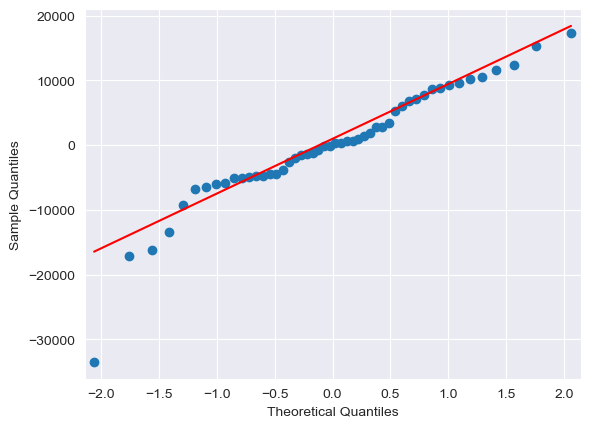

In [37]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.show()

In [38]:
print(list(np.where(model.resid<-20000)))
print(list(np.where(model.resid>14000)))

[array([49], dtype=int64)]
[array([36, 45], dtype=int64)]


# Residual Plot for Homoscedasticity 

In [39]:
def get_standardized_values (value):
    return (value - value.mean())/value.std()

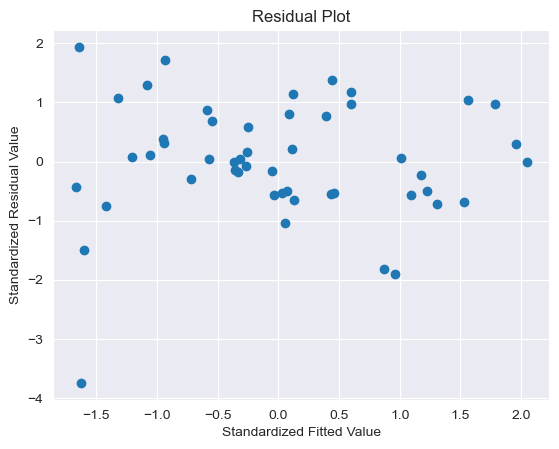

In [40]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Value')
plt.ylabel('Standardized Residual Value')
plt.show()

# Residual vs Regressor

eval_env: 1


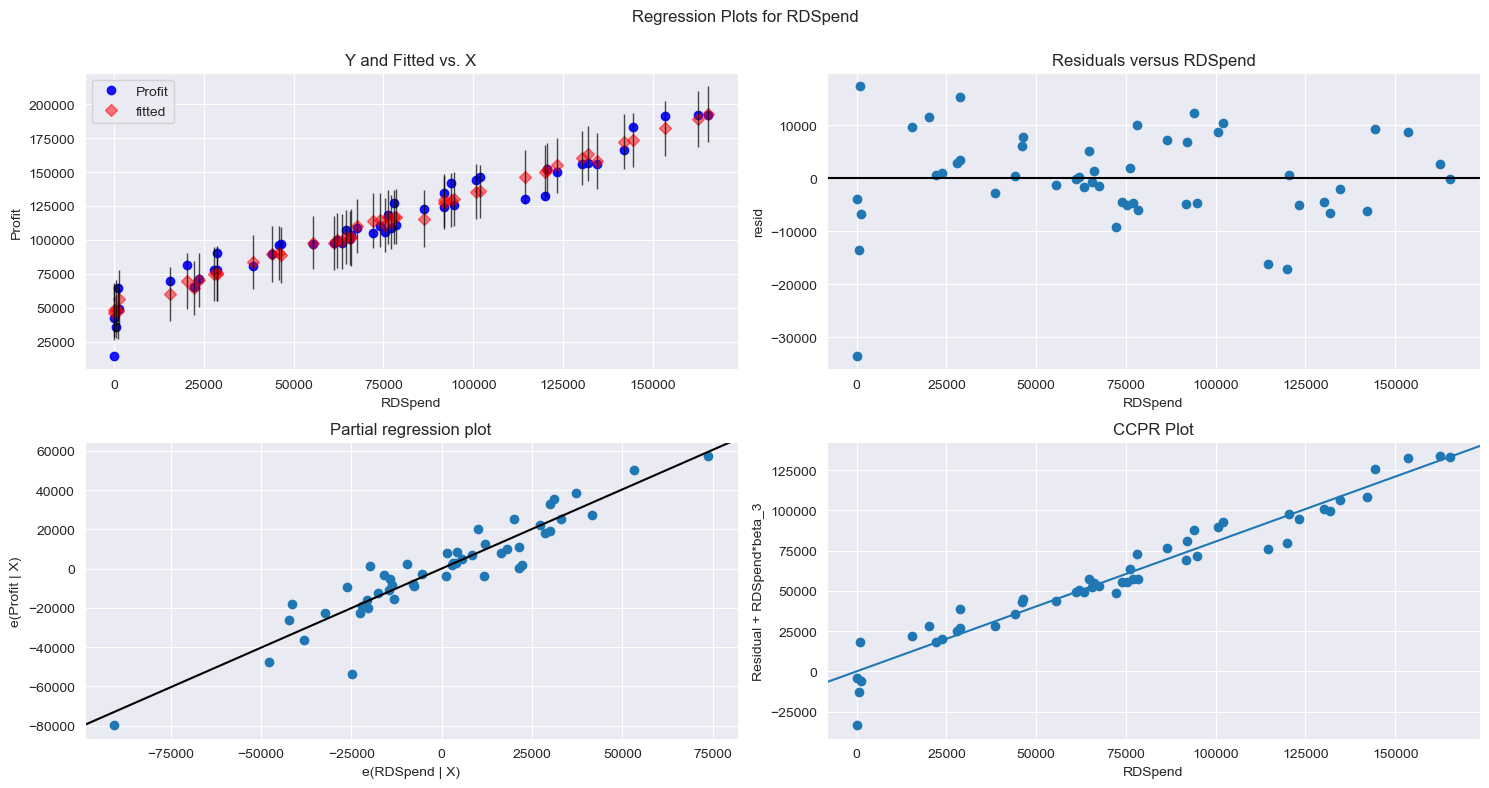

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

eval_env: 1


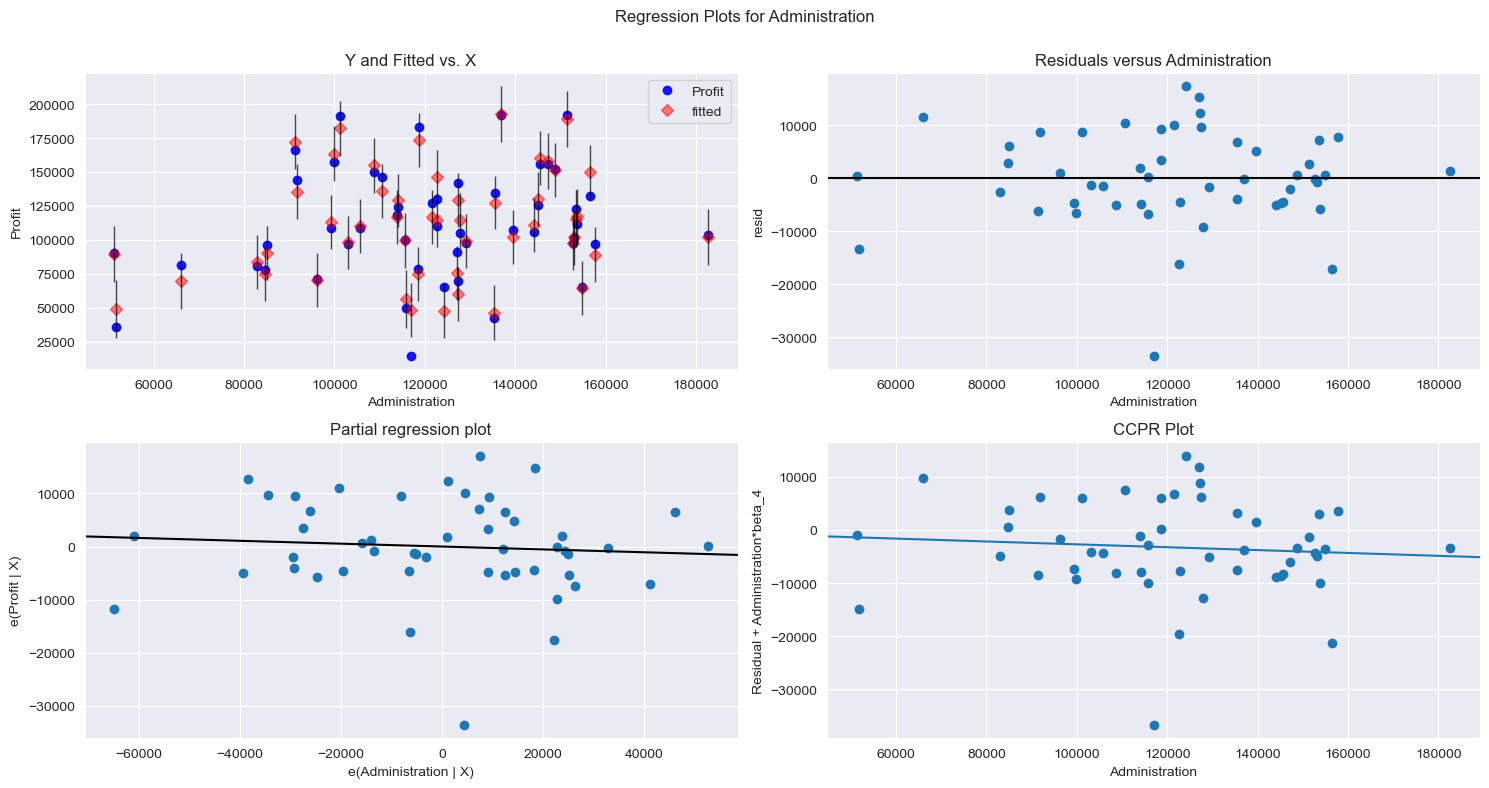

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


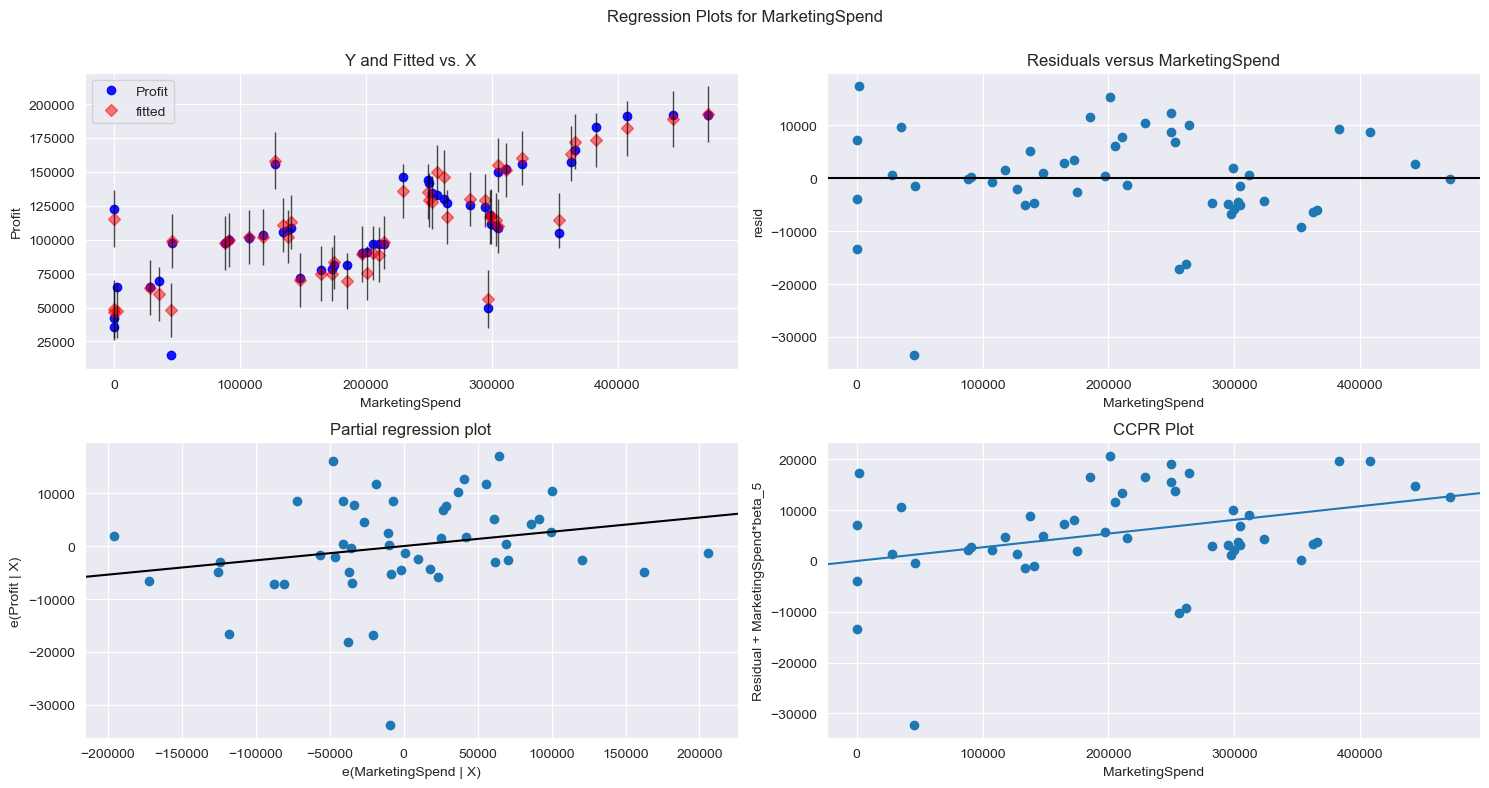

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

# Detecting Influencer and Outlier 

In [44]:
influencer = model.get_influence()
(i, _) = influencer.cooks_distance

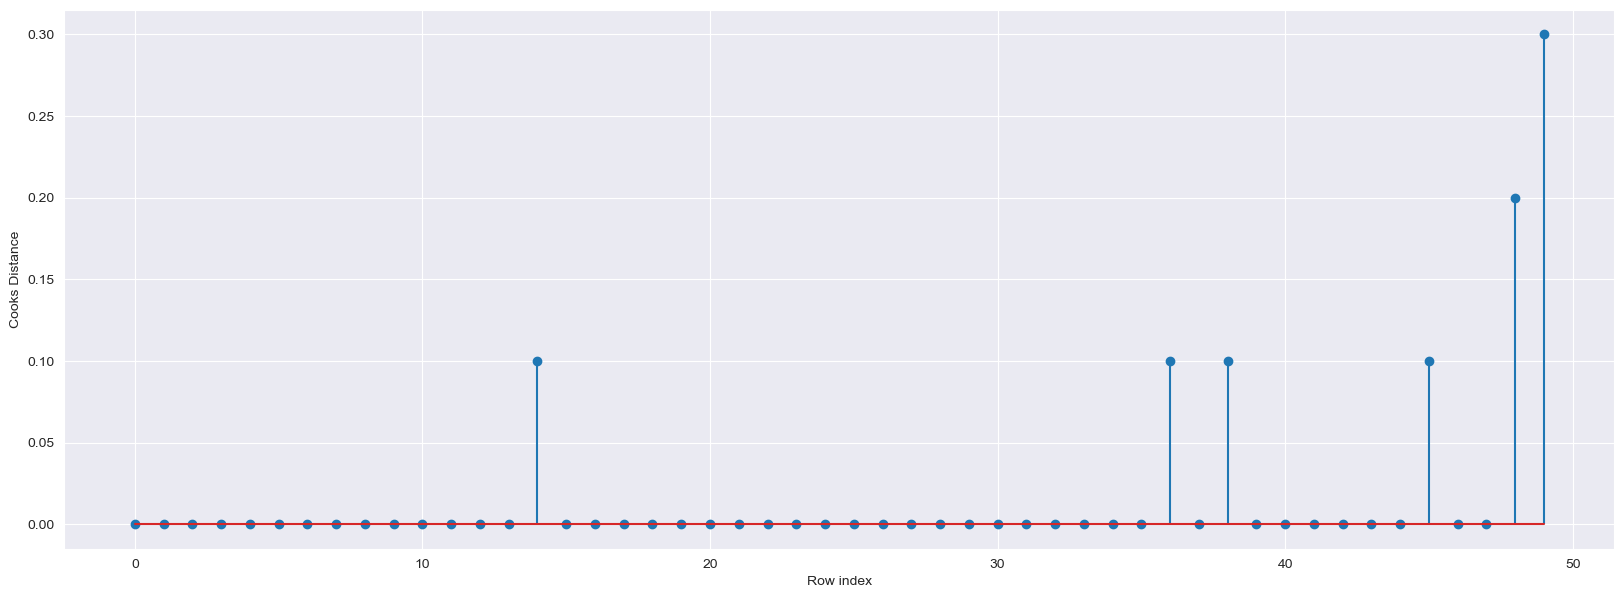

In [45]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(comp)), np.round(i, 1))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
(np.argmax(i),np.max(i))

(49, 0.2639594358613881)

In [47]:
# Model is good beacuse Cook distance is less than 1

# High influence points

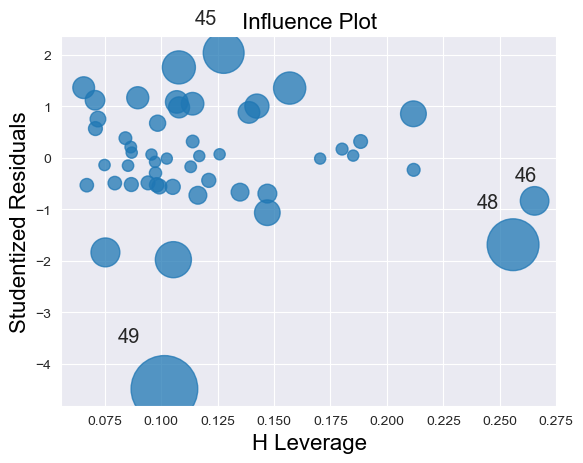

In [48]:
influence_plot(model)
plt.show()

# Drop inflencer Data

In [49]:
comp.iloc[[48,49],:]

,RDSpend,Administration,MarketingSpend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [50]:
# Drop 48 and 49 no row beacuse Here some 0 Values
n_comp = comp.drop(comp.index[[49,48]], axis = 0).reset_index()

# Imporve Model

In [51]:
n_model = smf.ols('Profit ~ RDSpend + Administration + MarketingSpend + State', data=n_comp).fit()
n_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           7.02e-29
Time:                        15:01:44   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.939e+04   6093.634      9.746      0.000    4.71e+04    7.17e+04
State[T.Florida]  -1150.1897   2712.520     -0.424      0.674   -6624.276    4323.896
State[T.New York]  -665.7875   2678.779     -0.249      0.805   -6071.783    4740.208
RDSpend               0.7888      0.037     21.160      0.000       0.714       0.864
Administration       -0.0621      0.045     -1.381      0.174      -0.153       0.029
MarketingSpend        0.0179      0.014      1.275      0.209      -0.010       0.046
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
n_model.rsquared , n_model.rsquared_adj , n_model.aic

(0.9628371102993712, 0.9584129567635821, 998.4621953724801)

# Our Model is Good

# Predicting New Data

In [53]:
inputdata = ({'RDSpend':[256942],'Administration':[124689],'MarketingSpend':[256745],'State':'California'})
newdata = pd.DataFrame(inputdata)

In [54]:
model.predict(newdata) # Old Model

0    260786.337543
dtype: float64

In [55]:
Pred_Profit2 = n_model.predict(newdata) # Imporve Model
print(Pred_Profit2)

0    258904.793042
dtype: float64


# Camparision Between Regression and OLS Model

In [56]:
print('Regression Model Profit',Pred_Profit1)
print('Improve Model Profit',Pred_Profit2)
# Both Model are nearly Working Same.

Regression Model Profit [[260116.38286498]]
Improve Model Profit 0    258904.793042
dtype: float64
